In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\91897\Downloads\upgrad final 5 capstone projects\Nutrical Dataset.csv")

In [84]:
df.head(5)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [85]:
# Approach
# 1. Understanding the dataset.
# 2. Checking for errors.

In [86]:
df.isnull().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

In [87]:
df.duplicated().sum()

np.int64(0)

In [88]:
df.shape

(260, 24)

In [89]:
df['Category'].nunique()

9

#### Let's start with understanding the categories firstly

In [90]:
df['Category'].value_counts()

Category
Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Chicken & Fish        27
Beverages             27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

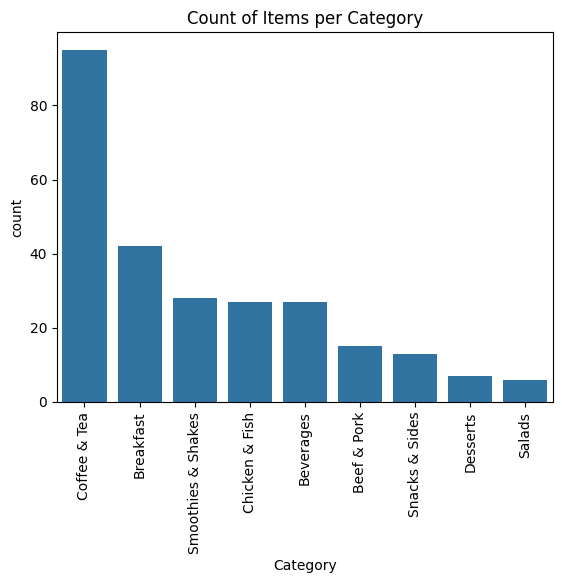

In [91]:
sns.barplot(data = (df['Category'].value_counts())).set_title('Count of Items per Category')
# plt.title('Count') both options work this one is little easy
plt.xticks(rotation= 90) #switches the x-labels into vertical alignment
plt.show

#### Creating an Average Chart that will give value for each category making easy the analysis easier.

In [95]:
avgChart = df.groupby('Category').agg(
    avgCalories = ('Calories', lambda x: round(x.mean(), 2)),
    avgFat = ('Total Fat', lambda x: round(x.mean(), 2)),
    avgSatFat = ('Saturated Fat', lambda x: round(x.mean(), 2)),
    avgTFat = ('Trans Fat', lambda x: round(x.mean(), 2)),
    avgCholesterol = ('Cholesterol', lambda x: round(x.mean(), 2)),
    avgSodium = ('Sodium', lambda x: round(x.mean(), 2)),
    avgCarbs = ('Carbohydrates', lambda x: round(x.mean(), 2)),
    avgDietFiber = ('Dietary Fiber', lambda x: round(x.mean(), 2)),
    avgSugars = ('Sugars', lambda x: round(x.mean(), 2)),
    avgProtien = ('Protein', lambda x: round(x.mean(), 2))
).reset_index()

### Calories

- The daily caloric needs of an individual depends upon a individuals needs and goals 

In [96]:
avgChart

,Category,avgCalories,avgFat,avgSatFat,avgTFat,avgCholesterol,avgSodium,avgCarbs,avgDietFiber,avgSugars,avgProtien
0,Beef & Pork,494.00,24.87,10.47,1.10,87.33,1020.67,40.13,2.53,8.80,27.33
1,Beverages,113.70,0.09,0.06,0.00,0.56,41.48,28.81,0.04,27.85,1.33
2,Breakfast,526.67,27.69,10.65,0.11,152.86,1211.07,49.76,3.26,8.26,19.86
3,Chicken & Fish,552.96,26.96,6.17,0.13,75.37,1257.78,49.07,2.93,7.33,29.11
4,Coffee & Tea,283.89,8.02,4.92,0.14,27.26,136.89,44.53,0.78,39.61,8.86
5,Desserts,222.14,7.36,4.29,0.00,15.00,117.14,34.86,1.00,26.14,4.00
6,Salads,270.00,11.75,3.75,0.00,51.67,588.33,21.67,4.50,6.83,19.83
7,Smoothies & Shakes,531.43,14.12,8.38,0.54,45.00,183.57,90.43,1.46,77.89,10.86
8,Snacks & Sides,245.77,10.54,2.69,0.00,18.46,395.77,29.15,1.54,4.08,8.38


<function matplotlib.pyplot.show(close=None, block=None)>

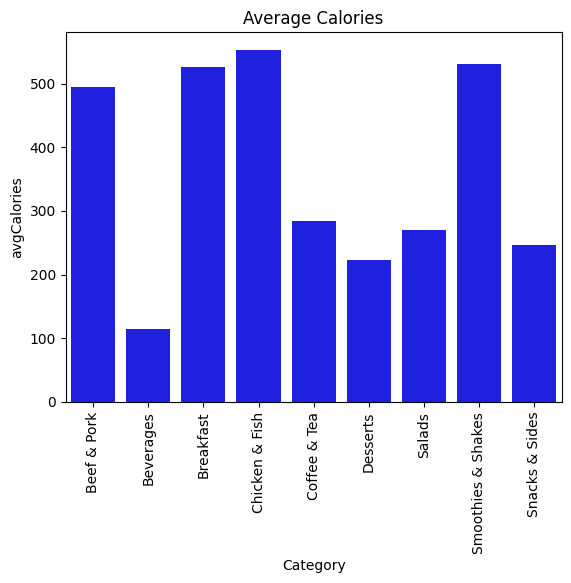

In [97]:
sns.barplot(x= 'Category', y= 'avgCalories', data= avgChart, color= '#0000ff')
plt.title('Average Calories')
plt.xticks(rotation= 90)
plt.show

- Of all the categories **Chicken & Fish** has the most amount of Calories.
- Which is followed by **Smoothies & Shakes** and **Breakfast** and **Beef & Pork**.
- **Beverages** amount for the least amount of Calories.

- For customers who are willing to have meal that contains a high caloric count they have about more than 4 categories to choose from with a total of 97 items.

In [98]:
calorieRichItems = len(df.loc[
(df.Category == 'Beef & Port') | (df.Category == 'Breakfast') | (df.Category == 'Chicken & Fish') | (df.Category == 'Smoothies & Shakes')
])

In [99]:
calorieRichItems

97

### Total Fats

<function matplotlib.pyplot.show(close=None, block=None)>

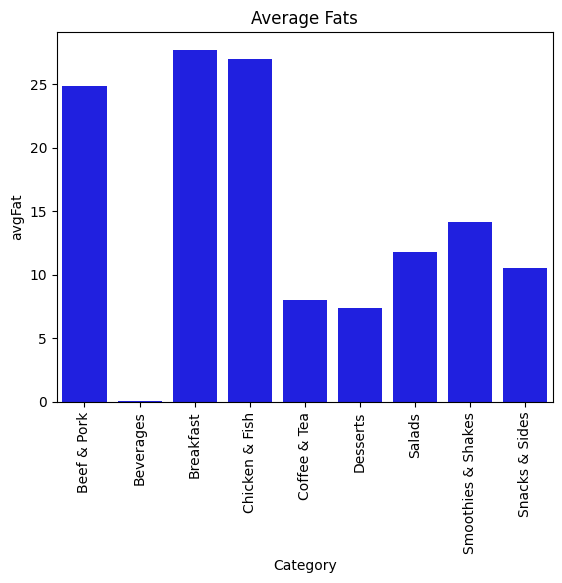

In [100]:
sns.barplot(x= 'Category', y= 'avgFat', data= avgChart, color= '#0000ff')
plt.title('Average Fats')
plt.xticks(rotation= 90)
plt.show

- The category **Breakfast** accounts for most amount of Fats.
- Followed by **Chicken & Fist** and **Beef & Pork** respectively.
- The most important fact here is that **Beverages** contains the minimum amount of average fats amounting to only 0.9

In [101]:
# Let's check since beverages has  minimum amount of avg. fats what is the highest inside them

In [102]:
df.loc[
(df.Category == 'Beverages'), ['Item', 'Total Fat']
].sample(5)

,Item,Total Fat
135,Minute Maid Orange Juice (Large),0.0
120,Dr Pepper (Large),0.0
117,Diet Coke (Child),0.0
124,Diet Dr Pepper (Large),0.0
129,Sprite (Child),0.0


In [103]:
allowedFats = 65
allowedFatsPerMeal = 65*(25/100)
highFats = allowedFats*(50/100)

In [104]:
# Let's find out how many items are there with over more than allowed fats level

In [105]:
df.loc[
(df['Total Fat'] > allowedFatsPerMeal)
].shape

(97, 24)

In [106]:
# it means out of 260 items 97 items contains Total Fats level that is more than the allowed fats level per meal

In [107]:
df.loc[
(df['Total Fat'] > 65)
].shape

(1, 24)

In [108]:
# There is one item that contains fats more than the allowed fat levels
# This item is of Category: 'Chicken and Fish' and it is called 'Chicken Nuggets'

In [109]:
# All most all of the beverages contains 0 fats exculiding this
df.loc[
(df.Category == 'Beverages') & (df['Total Fat'] != 0), ['Item', 'Total Fat']
]
# Only 1% Low Fat Milk Jug from Beverages is the item with fat with that of just 2.5

,Item,Total Fat
130,1% Low Fat Milk Jug,2.5


### Saturated Fats

<function matplotlib.pyplot.show(close=None, block=None)>

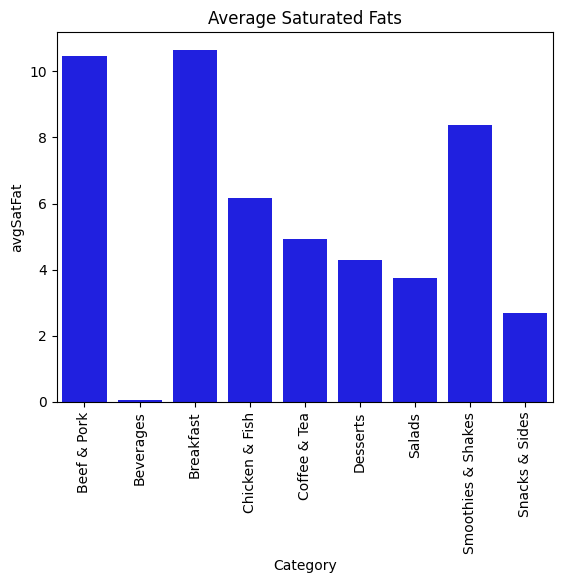

In [110]:
sns.barplot(x= 'Category', y= 'avgSatFat', data= avgChart, color= '#0000ff')
plt.title('Average Saturated Fats')
plt.xticks(rotation= 90)
plt.show

- For Saturated Fats, the distribution looks similar to that of Total Fats, with minor changes.
- Like the last time **Beverages** maintained the first position for least amount of Saturated Fats.
- **Breakfast** leads the chart, followed up by **Beef & Port** and **Smoothies & Shakes**.
- The interesting fat over here is that **Chicken & Fish** is replaced by **Smoothies & Shakes**.
- This is because **Chicken & Fish** are rich in Unsaturated Fats, which are beneficial for heart health

- This is to be kept in mind that the more the amount of Saturated Fats, the more is the chance of increasing Cholesterol level in blood, giving rise to heart diseases.

In [111]:
df.loc[
(df['Saturated Fat (% Daily Value)'] > 30), ['Category', 'Item']
].shape

(112, 2)

- After analyzing saturated fats on the basis of their quantity per meal, we've realized that there are 112 items, that contains saturated fats more than advised amount per meal.

In [112]:
df.loc[
(df['Saturated Fat (% Daily Value)'] > 100), ['Category', 'Item', 'Saturated Fat']
]

,Category,Item,Saturated Fat
82,Chicken & Fish,Chicken McNuggets (40 piece),20.0
231,Coffee & Tea,Frappé Chocolate Chip (Large),20.0
253,Smoothies & Shakes,McFlurry with M&M’s Candies (Medium),20.0


- There are total of 3 items that contains more than advised saturated fats for a day in a single meal.
- They are Chicken McNuggets, McFlurry with M&M’s Candies (Medium), Frappé Chocolate Chip (Large). All of them had a value of 20.
- Most shocking thing about this is that **Frappé Chocolate Chip (Large)** is from **Coffee & Tea** category, which was the fifth in terms of avg saturated fats out of 9

### Trans Fats

<function matplotlib.pyplot.show(close=None, block=None)>

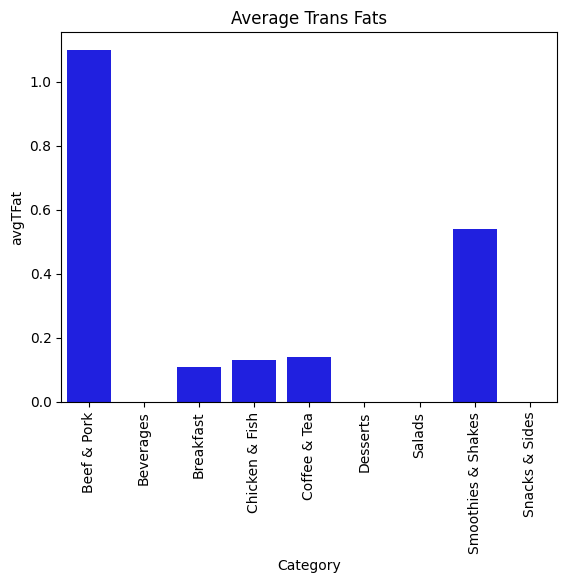

In [113]:
sns.barplot(x= 'Category', y= 'avgTFat', data= avgChart, color= '#0000ff')
plt.title('Average Trans Fats')
plt.xticks(rotation= 90)
plt.show

- The ideal amount of trans fat in any meal should be equal to zero, because this fat is harmful to health and can lead to heart diseases.
- On average **Beef & Pork** has the most amount of Trans Fats, followed by **Smoothies & Shakes** and **Coffee & Tea**.
- Since these fats are avoided mostly let's understand how many items from each category having higher avg. contains.

In [114]:
df.loc[
(df.Category == 'Beef & Pork') & (df['Trans Fat'] > 1)
].shape
# df.loc[
# (df.Category == 'Coffee & Tea') & (df['Trans Fat'] > 0)
# ].shape

(6, 24)

- **Beef & Pork** has a total of 6 items with Trans Fat amount more than 1.
- **Smoothies & Shakes** & **Coffee & Tea** has a total of 16 items that has Trans Fat more than 0.

### Cholesterol

<function matplotlib.pyplot.show(close=None, block=None)>

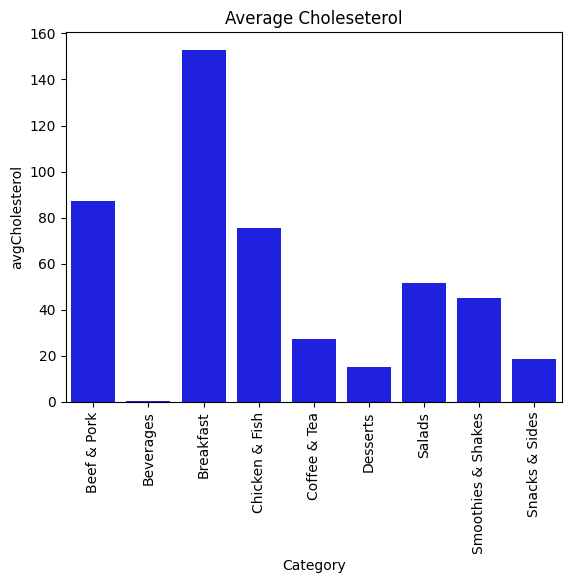

In [115]:
sns.barplot(x= 'Category', y= 'avgCholesterol', data= avgChart, color= '#0000ff')
plt.title('Average Choleseterol')
plt.xticks(rotation= 90)
plt.show

- **Breakfast** accounts for the most amount of average cholesterol, followed up by **Beef & Pork** and **Chicken & Fish**.
- **Beverages** on the other hand accounts for lowest amount of avg. cholesterol, followed up by Desserts.

In [116]:
df.loc[df['Cholesterol (% Daily Value)'] > 100, ['Category', 'Item', 'Cholesterol'] ]

,Category,Item,Cholesterol
27,Breakfast,Big Breakfast (Regular Biscuit),555
28,Breakfast,Big Breakfast (Large Biscuit),555
31,Breakfast,Big Breakfast with Hotcakes (Regular Biscuit),575
32,Breakfast,Big Breakfast with Hotcakes (Large Biscuit),575


- The cholesterol levels are balanced accros whole items, since only 30 items out of 261 has cholesterol level more than that of allwed level per meal.
- Plus there are only 4 items which contains Cholesterol more than allowed level per day in a single meal all from the **Breakfast** category.

### Sodium

<function matplotlib.pyplot.show(close=None, block=None)>

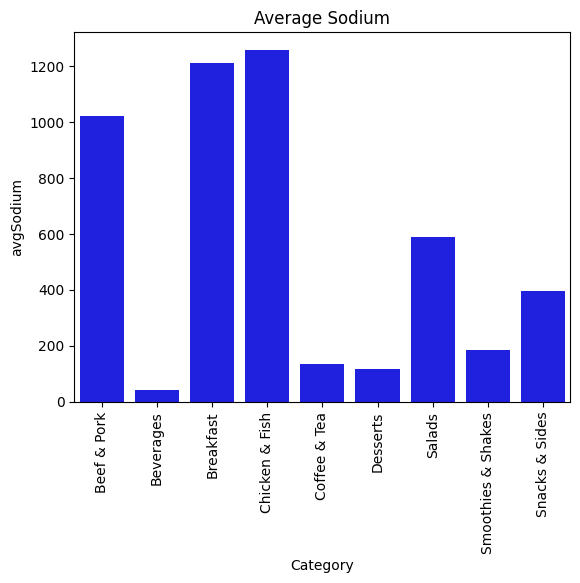

In [117]:
sns.barplot(x= 'Category', y= 'avgSodium', data= avgChart, color= '#0000ff')
plt.title('Average Sodium')
plt.xticks(rotation= 90)
plt.show

- **Chicken & Fish** has the most amount of average Sodium, followed up by **BreakFast** and **Beef & Pork**.
- **Beverages** account for lowest amount of average Sodium.

In [118]:
df.loc[
(df['Sodium (% Daily Value)'] < 15)
].shape

(166, 24)

In [119]:
k = df.loc[
(df['Sodium (% Daily Value)'] < 15)
]
k['Category'].value_counts()

Category
Coffee & Tea          95
Beverages             27
Smoothies & Shakes    25
Snacks & Sides         7
Desserts               7
Breakfast              3
Salads                 2
Name: count, dtype: int64

- About 78 food items contains the sodium more than the advised amount for a single meal.
- Only 1 food items contains the sodium moee than the advised amount for a day in a single meal. This is **Chicken McNuggets**.
- There are 166 food items which have less sodium content.
- This is because categories like **Coffee & Tea**, **Beverages**, **Smoothies and Shakes** doesn't contain Sodium in higher quantities.

### Carbohydrates

<function matplotlib.pyplot.show(close=None, block=None)>

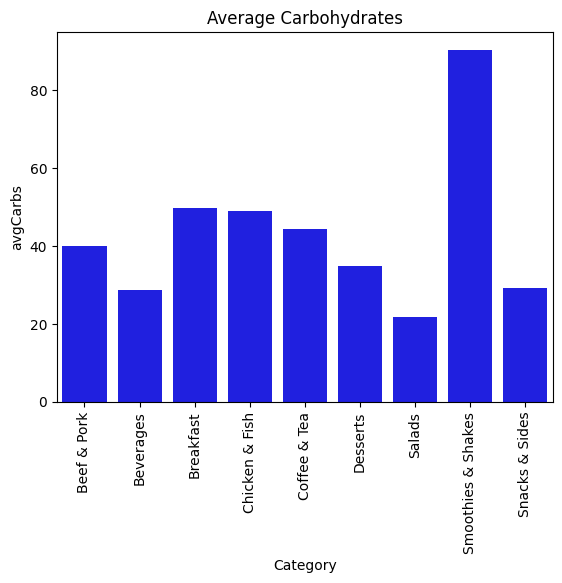

In [120]:
sns.barplot(x= 'Category', y= 'avgCarbs', data= avgChart, color= '#0000ff')
plt.title('Average Carbohydrates')
plt.xticks(rotation= 90)
plt.show

- **Smoothies and Shakes** contains most amount of average carbohydrates.
- Followed by **Breakfast** and **Chicken & Fish**.
- In bar plot we can see that **Smoothies and Shakes** have considerably higher level of carbohydrates. This could be because of some outlier inside Smoothies and Shakes.

In [121]:
df.loc[
df['Carbohydrates (% Daily Value)'] < 15
].shape

(127, 24)

- There are 20 items that contains carbohydrates more than the advised limit per meal.
- Unlike others there are no items that cross the limit of maximum amount of advised limit per day.

In [122]:
df.iloc[:, 0:20].head(1)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17


### Dietary Fiber

<function matplotlib.pyplot.show(close=None, block=None)>

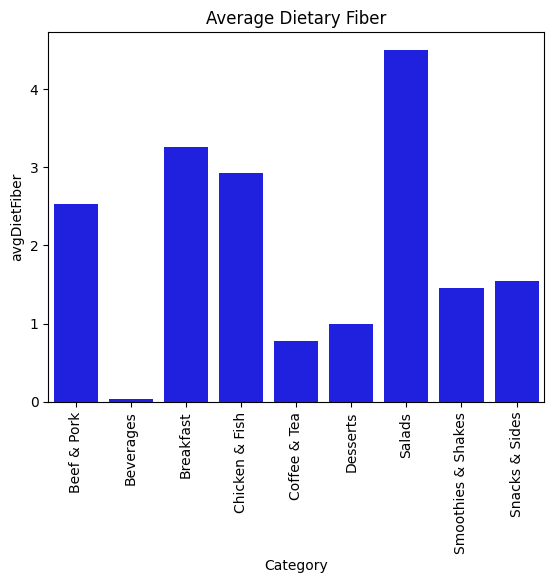

In [123]:
sns.barplot(x= 'Category', y= 'avgDietFiber', data= avgChart, color= '#0000ff')
plt.title('Average Dietary Fiber')
plt.xticks(rotation= 90)
plt.show

- **Salads** contains the most amount of average dietary fibers.
- Followed up by **Breakfast** and **Chicken & Fish**.
- **Beverages** which is obvious contains the least amount of dietary fibers.

In [124]:
df.loc[
df['Dietary Fiber (% Daily Value)'] > 30
].shape

(0, 24)

- It is to be noted that none of the food items contains more than the allowed level of Dietary Fiber for a single meal.

### Sugars

<function matplotlib.pyplot.show(close=None, block=None)>

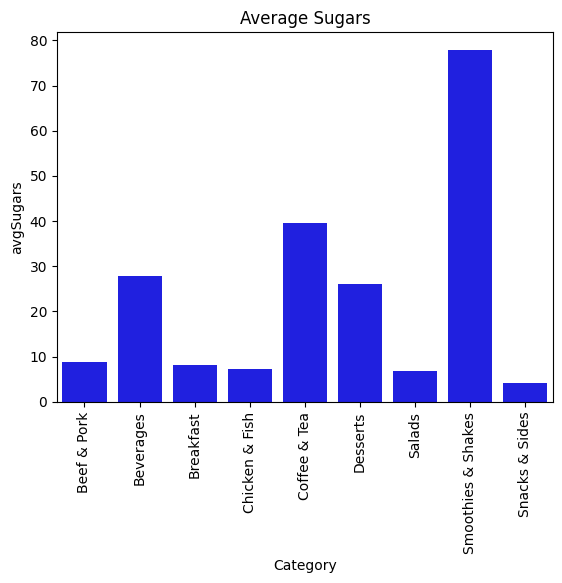

In [125]:
sns.barplot(x= 'Category', y= 'avgSugars', data= avgChart, color= '#0000ff')
plt.title('Average Sugars')
plt.xticks(rotation= 90)
plt.show

- For sugars level, we have **Smoothies & Shakes** leading the chart reaching the mark of 80.
- **Coffee and Tea**, **Beverages** and **Desserts** are also within the range of 30-40.
- **Snacks & Slides** amount for the least amount of sugar contents.

- Categories like **Beef & Pork**, **Breakfast**, **Chicken & Fish**, **Salads** and **Snacks & Slides** contains the sugar level in range of less than 10.

In [126]:
allowedSugar = 30 #whole day
# Let's check if there are any items that cross this limit since this is maximum upper limit for whole day

In [127]:
df.loc[
df['Sugars'] >= allowedSugar, ['Category']
].value_counts()

Category          
Coffee & Tea          65
Smoothies & Shakes    28
Beverages             12
Desserts               3
Breakfast              2
Name: count, dtype: int64

- There are almost 110 items that contains added sugar more than the advised limit for a day in one single meal.
- Meaning after consuming these items, concerned person should not consume any sugars for rest of the day, in order to create a balance.
- It is observed that there are 65 items in **Coffee & Tea**, 28 in **Smoothies & Shakes** and 12 in **Beverages** that has higher level of sugars than the advised level.
- It is to be noted that **Coffee & Tea** contains a total of 95 out of which 65 items have high Sugar level, and what's suprising that all items in **Smoothies & Shakes** have a high Sugar level, and more than 50% of Beverages contains high Sugars.

In [128]:
df['Category'].value_counts()

Category
Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Chicken & Fish        27
Beverages             27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: count, dtype: int64

### Protein

<function matplotlib.pyplot.show(close=None, block=None)>

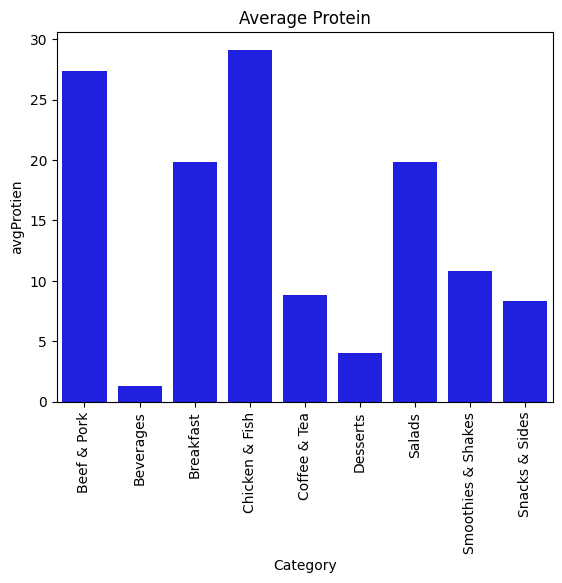

In [129]:
sns.barplot(x= 'Category', y= 'avgProtien', data= avgChart, color= '#0000ff')
plt.title('Average Protein')
plt.xticks(rotation= 90)
plt.show

- **Chicken & Fish** contains the most amount of average Protein, followed up by **Beef & Pork**.
- **Breakfast** and **Salads** are tied for their Protein contents.
- **Beverages** contains the least amount Potein which is justified, followed up by **Desserts**.

In [130]:
# Let's understand the distribution of Protein among categories, this is essential as sometimes there are outliers present that makes the average looks greater than the reality.

In [131]:
# Since Protein is something that varies from person to person, as it is directly related to weight and health goals of an individual.
# We will consider filtering for 40 to 56.
# NOTE: The above mentioned protein content is enough for a person ranging from weight 50 and 70, any perosn weighing more than 70 obviously needs more than that.

In [132]:
df.loc[
(df['Protein'] > 56)
].shape

(1, 24)

In [133]:
df['Protein']

0      17
1      18
2      14
3      21
4      21
       ..
255    12
256    15
257     8
258    21
259    10
Name: Protein, Length: 260, dtype: int64

#### Since we have a lot of nutrients lets find out the food items that are rich in Protein and at the same time contains less amount of Fats.

In [134]:
df.iloc[:, 0:20].head(1)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17


In [135]:
df.loc[
(df['Total Fat (% Daily Value)'] <= 20) & (df['Protein'] >= 14)
].shape

(21, 24)

In [136]:
df.loc[
(df['Total Fat (% Daily Value)'] <= 20) & (df['Protein'] >= 14), ['Category']
].value_counts()

Category      
Coffee & Tea      11
Snacks & Sides     3
Chicken & Fish     2
Breakfast          2
Salads             2
Beef & Pork        1
Name: count, dtype: int64

- There are around 21 food items in total that has less amount of fats and enough amount of proteins.
- The fat level are as low as 20% of the daily allowed value, with protein more than 14.
- There are only 6 Categories that fall into this criteria of less fats and higher proteins and they are **Coffee & Tea**, **Snacks & Sides**, **Chicken & Fish**, etc.

#### Let's find out the most optimal meals where the % daily value criteria is working fine.

In [137]:
df.iloc[:, 0:20].head(1)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17


In [138]:
df.loc[
    (df['Total Fat (% Daily Value)'] < 25) & (df['Saturated Fat (% Daily Value)'] < 25) & (df['Cholesterol (% Daily Value)'] < 25) & (df['Sodium (% Daily Value)'] < 25) & (df['Carbohydrates (% Daily Value)'] < 25) & (df['Dietary Fiber (% Daily Value)'] < 250)
].shape

(105, 24)

In [139]:
d = df.loc[
    (df['Total Fat (% Daily Value)'] < 25) & 
    (df['Saturated Fat (% Daily Value)'] < 25) & 
    (df['Cholesterol (% Daily Value)'] < 25) & 
    (df['Sodium (% Daily Value)'] < 25) & 
    (df['Carbohydrates (% Daily Value)'] < 25) & 
    (df['Dietary Fiber (% Daily Value)'] < 250), ['Category']
].value_counts().reset_index()

- There are a total of 105 food items from all food items which contains nutrients in a limited and allowed quantity.
- Most of these items are from category **Coffee & Tea**, followed up by **Beverages** and **Smoothies & Shakes**.
- The good thing about this was that there are no food items for which the allowed limit was crossed in all nutrients.

<function matplotlib.pyplot.show(close=None, block=None)>

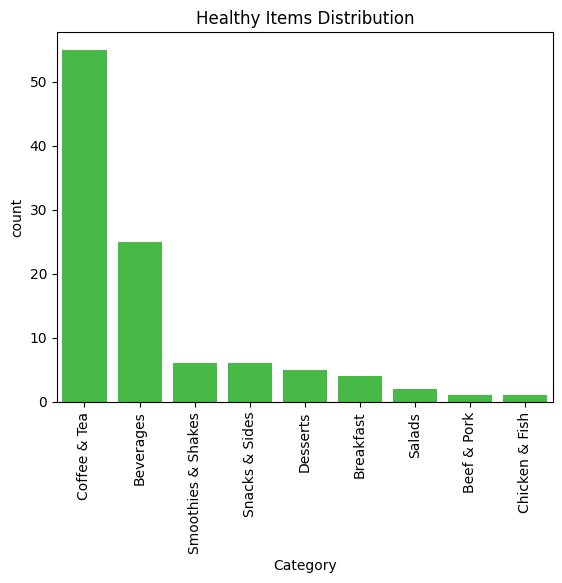

In [140]:
sns.barplot(data= d, x= 'Category', y= 'count', color= '#33cc33')
plt.title('Healthy Items Distribution')
plt.xticks(rotation= 90)
plt.show